# Laboratorio 1: Encontrar las patrones de color caracteristicos


### ¿Qué vamos a hacer hoy?
Vamos a enseñarle a la computadora a **encontrar Patrones especificos** de arachnida salticidae.

### ¿Cómo lo haremos?
1. **Cargar una imagen**
2. **Explorar cómo la computadora "ve" los colores** (números RGB)
3. **Crear una regla simple** para identificar el color naranja
4. **Aplicar esa regla** para encontrar todas los patrones de la araña
5. **Ver el resultado** con el patron encontrado


## Paso 1: Preparar nuestras herramientas
Primero necesitamos "importar" las herramientas que nos ayudarán a trabajar con imágenes.

In [11]:
# Estas son nuestras "herramientas digitales"
import numpy as np           # Para trabajar con números y matrices
import matplotlib.pyplot as plt  # Para mostrar imágenes y gráficos
import cv2                   # Para cargar imágenes
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Colab

print("Herramientas listas para usar")
print("Ahora podemos cargar y trabajar con imágenes")

Herramientas listas para usar
Ahora podemos cargar y trabajar con imágenes


## Paso 2: Cargar nuestra imagen
Vamos a descargar y cargar una imagen de una araña con un patron de colores particlar

Imagen cargada exitosamente
Tamaño de la imagen: (1350, 1800, 3)
   - Alto: 1350 píxeles
   - Ancho: 1800 píxeles
   - Canales de color: 3 (Rojo, Verde, Azul)


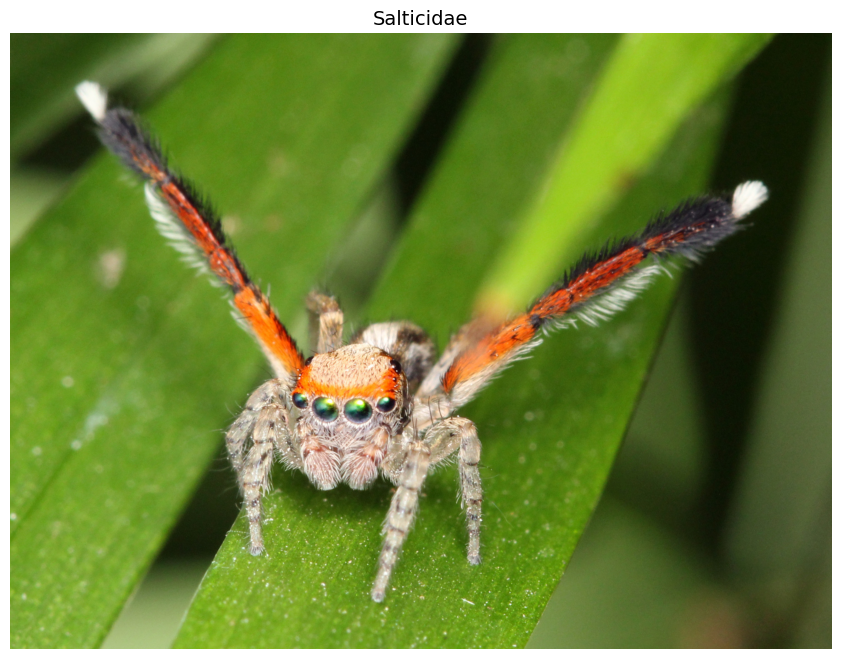

In [12]:
# Descargamos una imagen con arachnida variadas
!wget -q https://upload.wikimedia.org/wikipedia/commons/a/a1/Saitis_barbipes_signaling.jpg -O arachnida.jpg

# Cargamos la imagen
imagen_original = cv2.imread('arachnida.jpg')

# Verificamos si la imagen se cargó correctamente
if imagen_original is None:
    print("ERROR: No se pudo cargar la imagen. Asegúrate de que la imagen exista y no esté corrupta.")
else:
    # IMPORTANTE: OpenCV carga en formato BGR, pero nosotros queremos RGB
    # Cambiamos el orden de los colores: [Azul, Verde, Rojo] → [Rojo, Verde, Azul]
    imagen_rgb = imagen_original[:, :, [2, 1, 0]]

    print(f"Imagen cargada exitosamente")
    print(f"Tamaño de la imagen: {imagen_rgb.shape}")
    print(f"   - Alto: {imagen_rgb.shape[0]} píxeles")
    print(f"   - Ancho: {imagen_rgb.shape[1]} píxeles")
    print(f"   - Canales de color: {imagen_rgb.shape[2]} (Rojo, Verde, Azul)")

    # Mostramos la imagen
    plt.figure(figsize=(12, 8))
    plt.imshow(imagen_rgb)
    plt.title('Salticidae', fontsize=14)
    plt.axis('off')  # Quitamos los números de los ejes para ver mejor
    plt.show()

## Paso 3: El Secreto - ¡Las imágenes son números!
Aquí viene lo más importante: para la computadora, **cada píxel es solo un conjunto de 3 números**.

### ¿Cómo funciona?
- **Número 1**: Cantidad de ROJO (0 = nada de rojo, 255 = rojo puro)
- **Número 2**: Cantidad de VERDE (0 = nada de verde, 255 = verde puro)  
- **Número 3**: Cantidad de AZUL (0 = nada de azul, 255 = azul puro)

**¡Vamos a explorar esto!**

In [13]:
print("EXPLORANDO CÓMO LA COMPUTADORA VE LOS COLORES")
print("=" * 50)

# Vamos a examinar algunos píxeles específicos
# Coordenadas: [fila, columna] o [y, x]

# Escojamos un punto que se ve verde (ojo) - ajustado para la nueva imagen
y_ojo = 830  # fila en la zona de ojo
x_ojo = 750  # columna en la zona de ojo
pixel_ojo = imagen_rgb[y_ojo, x_ojo]

# Escojamos un punto que se ve marron claro
y_marron = 1030
x_marron = 875
pixel_marron = imagen_rgb[y_marron, x_marron]

# Escojamos un punto que se ve naranja
y_naranja = 600
x_naranja = 510
pixel_naranja = imagen_rgb[y_naranja, x_naranja]

print(f"Píxel de OJO en posición ({y_ojo}, {x_ojo}):")
print(f"   Rojo = {pixel_ojo[0]}")
print(f"   Verde = {pixel_ojo[1]}")
print(f"   Azul = {pixel_ojo[2]}")
print(f"   Los valores se parecen a un tono verde")

print(f"\nPíxel MARRON en posición ({y_marron}, {x_marron}):")
print(f"   Rojo = {pixel_marron[0]}")
print(f"   Verde = {pixel_marron[1]}")
print(f"   Azul = {pixel_marron[2]}")
print(f"   Fíjate: ROJO y VERDE son más altos que AZUL")

print(f"\nPíxel NARANJA en posición ({y_naranja}, {x_naranja}):")
print(f"   Rojo = {pixel_naranja[0]}")
print(f"   Verde = {pixel_naranja[1]}")
print(f"   Azul = {pixel_naranja[2]}")
print(f"   Fíjate: ROJO es alto, VERDE es medio, y AZUL es bajo = Naranja")

print("\nCONCLUSIÓN IMPORTANTE:")
print("Para encontrar algo naranja, buscamos píxeles donde:")
print(f"   ROJO sea alto (mayor a ~{max(120, pixel_naranja[0] - 30)})")
print(f"   VERDE sea medio (alrededor de ~{pixel_naranja[1]})")
print(f"   AZUL sea bajo (menor a ~{min(80, pixel_naranja[2] + 20)})")

EXPLORANDO CÓMO LA COMPUTADORA VE LOS COLORES
Píxel de OJO en posición (830, 750):
   Rojo = 29
   Verde = 81
   Azul = 68
   Los valores se parecen a un tono verde

Píxel MARRON en posición (1030, 875):
   Rojo = 212
   Verde = 200
   Azul = 174
   Fíjate: ROJO y VERDE son más altos que AZUL

Píxel NARANJA en posición (600, 510):
   Rojo = 248
   Verde = 117
   Azul = 27
   Fíjate: ROJO es alto, VERDE es medio, y AZUL es bajo = Naranja

CONCLUSIÓN IMPORTANTE:
Para encontrar algo naranja, buscamos píxeles donde:
   ROJO sea alto (mayor a ~218)
   VERDE sea medio (alrededor de ~117)
   AZUL sea bajo (menor a ~47)


### Visualicemos estos píxeles específicos
Para entender mejor, vamos a marcar estos píxeles en la imagen:

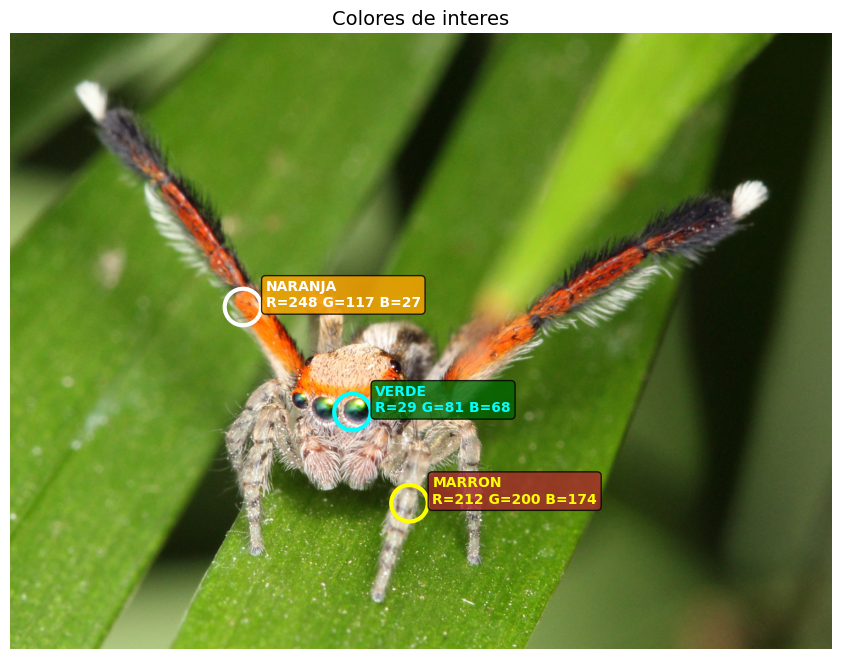

In [14]:
# Creamos una copia de la imagen para marcar los píxeles
imagen_marcada = imagen_rgb.copy()

# Dibujamos círculos pequeños en los píxeles que examinamos
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(imagen_rgb)

# Marcamos el píxel de verde
circulo_ojo = patches.Circle((x_ojo, y_ojo), radius=40, color='cyan', fill=False, linewidth=3)
ax.add_patch(circulo_ojo)
ax.text(x_ojo + 50, y_ojo, f'VERDE\nR={pixel_ojo[0]} G={pixel_ojo[1]} B={pixel_ojo[2]}',
        color='cyan', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='darkgreen', alpha=0.8))

# Marcamos el píxel MARRON
circulo_marron = patches.Circle((x_marron, y_marron), radius=40, color='yellow', fill=False, linewidth=3)
ax.add_patch(circulo_marron)
ax.text(x_marron + 50, y_marron, f'MARRON\nR={pixel_marron[0]} G={pixel_marron[1]} B={pixel_marron[2]}',
        color='yellow', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='brown', alpha=0.8))

# Marcamos el píxel NARANJA
circulo_naranja = patches.Circle((x_naranja, y_naranja), radius=40, color='white', fill=False, linewidth=3)
ax.add_patch(circulo_naranja)
ax.text(x_naranja + 50, y_naranja, f'NARANJA\nR={pixel_naranja[0]} G={pixel_naranja[1]} B={pixel_naranja[2]}',
        color='white', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='orange', alpha=0.8))


ax.set_title('Colores de interes', fontsize=14)
ax.axis('off')
plt.show()


## Paso 4: Separar la imagen en canales de color
Vamos a separar la imagen en sus tres "capas" de color.

SEPARANDO LA IMAGEN EN CANALES DE COLOR
Canal ROJO: valores de 2 a 255
Canal VERDE: valores de 0 a 255
Canal AZUL: valores de 0 a 255


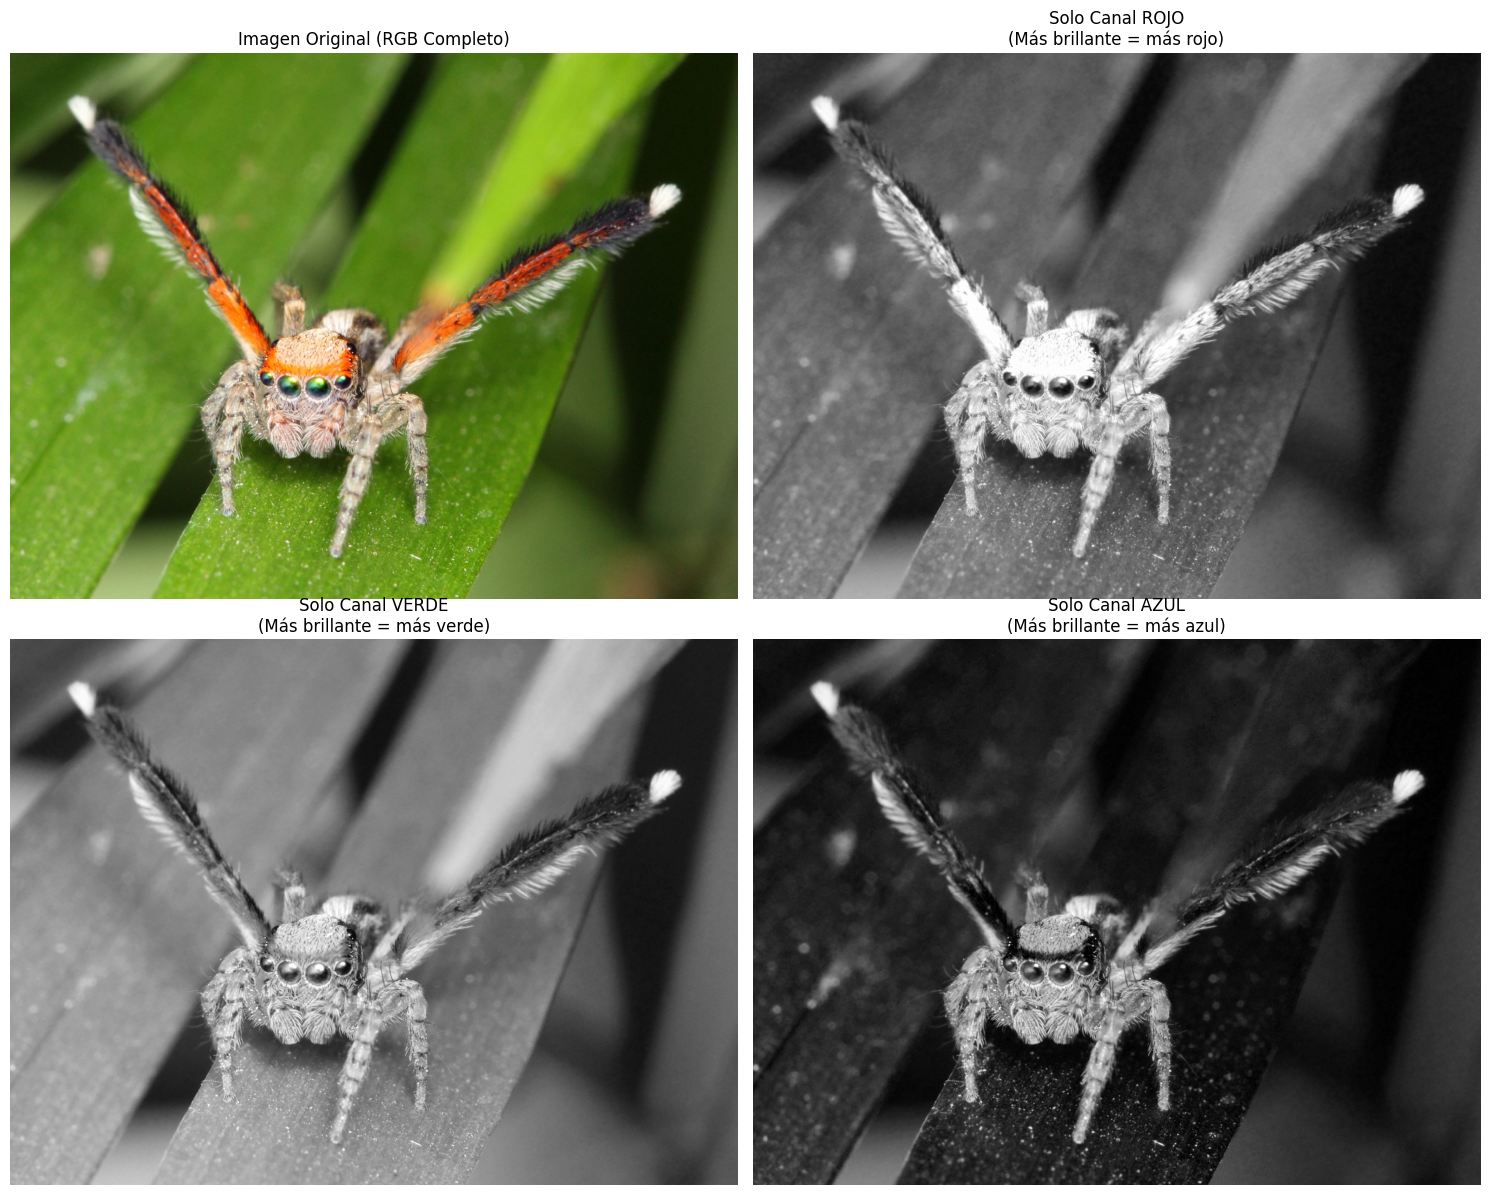


OBSERVA:
• En el canal ROJO, lo naranja aparecen muy brillantes (blancos)
• En el canal VERDE, las hojas y ojos de la araña aparecen mas brillantes


In [15]:
print("SEPARANDO LA IMAGEN EN CANALES DE COLOR")
print("=" * 45)

# Extraemos cada canal de color por separado
canal_rojo = imagen_rgb[:, :, 0]    # Canal 0 = Rojo
canal_verde = imagen_rgb[:, :, 1]   # Canal 1 = Verde
canal_azul = imagen_rgb[:, :, 2]    # Canal 2 = Azul

print(f"Canal ROJO: valores de {canal_rojo.min()} a {canal_rojo.max()}")
print(f"Canal VERDE: valores de {canal_verde.min()} a {canal_verde.max()}")
print(f"Canal AZUL: valores de {canal_azul.min()} a {canal_azul.max()}")

# Mostramos los tres canales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Imagen original
axes[0, 0].imshow(imagen_rgb)
axes[0, 0].set_title('Imagen Original (RGB Completo)', fontsize=12)
axes[0, 0].axis('off')

# Canal Rojo - mostramos en escala de grises para ver intensidades
axes[0, 1].imshow(canal_rojo, cmap='gray')
axes[0, 1].set_title('Solo Canal ROJO\n(Más brillante = más rojo)', fontsize=12)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(canal_verde, cmap='gray')
axes[1, 0].set_title('Solo Canal VERDE\n(Más brillante = más verde)', fontsize=12)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(canal_azul, cmap='gray')
axes[1, 1].set_title('Solo Canal AZUL\n(Más brillante = más azul)', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\nOBSERVA:")
print("• En el canal ROJO, lo naranja aparecen muy brillantes (blancos)")
print("• En el canal VERDE, las hojas y ojos de la araña aparecen mas brillantes")

## Paso 5: Crear nuestra regla para encontrar el color caracteristico
Ahora viene la parte emocionante: vamos a crear una regla simple para que la computadora identifique automáticamente qué píxeles pertenecen a los ojos de la araña

In [16]:

# Definimos nuestros umbrales (límites) ajustados
umbral_rojo_minimo = 200    # El rojo debe ser al menos 200
umbral_verde_maximo = 165    # El verde debe ser máximo 1
umbral_azul_maximo = 60     # El azul debe ser máximo 2

print(f"REGLAS DEFINIDAS:")
print(f"   Rojo >= {umbral_rojo_minimo} (debe tener mucho rojo)")
print(f"   Verde <= {umbral_verde_maximo} (debe tener poco verde)")
print(f"   Azul <= {umbral_azul_maximo} (debe tener poco azul)")

# Aplicamos cada regla por separado
condicion_rojo = canal_rojo >= umbral_rojo_minimo
condicion_verde = canal_verde <= umbral_verde_maximo
condicion_azul = canal_azul <= umbral_azul_maximo

print(f"\nAPLICANDO REGLAS:")
print(f"   Píxeles que cumplen condición ROJO: {condicion_rojo.sum():,}")
print(f"   Píxeles que cumplen condición VERDE: {condicion_verde.sum():,}")
print(f"   Píxeles que cumplen condición AZUL: {condicion_azul.sum():,}")

# Ahora combinamos TODAS las condiciones
mascara_naranja = condicion_rojo & condicion_verde & condicion_azul

pixeles_naranja = mascara_naranja.sum()
pixeles_totales = imagen_rgb.shape[0] * imagen_rgb.shape[1]
porcentaje_naranja = (pixeles_naranja / pixeles_totales) * 100

print(f"\nRESULTADO FINAL:")
print(f"   Píxeles identificados NARANJA: {pixeles_naranja:,}")
print(f"   Píxeles totales en la imagen: {pixeles_totales:,}")
print(f"   Porcentaje de la imagen de color naranja: {porcentaje_naranja:.2f}%")

if pixeles_naranja > 1000:
    print("\n¡Parece que encontramos el color en la imagen!")
else:
    print("\nPocos píxeles detectados. Tal vez necesitemos ajustar nuestros umbrales.")

REGLAS DEFINIDAS:
   Rojo >= 200 (debe tener mucho rojo)
   Verde <= 165 (debe tener poco verde)
   Azul <= 60 (debe tener poco azul)

APLICANDO REGLAS:
   Píxeles que cumplen condición ROJO: 118,679
   Píxeles que cumplen condición VERDE: 2,055,457
   Píxeles que cumplen condición AZUL: 2,024,738

RESULTADO FINAL:
   Píxeles identificados NARANJA: 19,508
   Píxeles totales en la imagen: 2,430,000
   Porcentaje de la imagen de color naranja: 0.80%

¡Parece que encontramos el color en la imagen!


## Paso 6: Ver nuestra máscara - ¡El mapa del tesoro!
La "máscara" es como un mapa que nos muestra dónde esta el color que necesitamos estudiar. **Blanco = color naranja encontrada, Negro = no es naranja**.

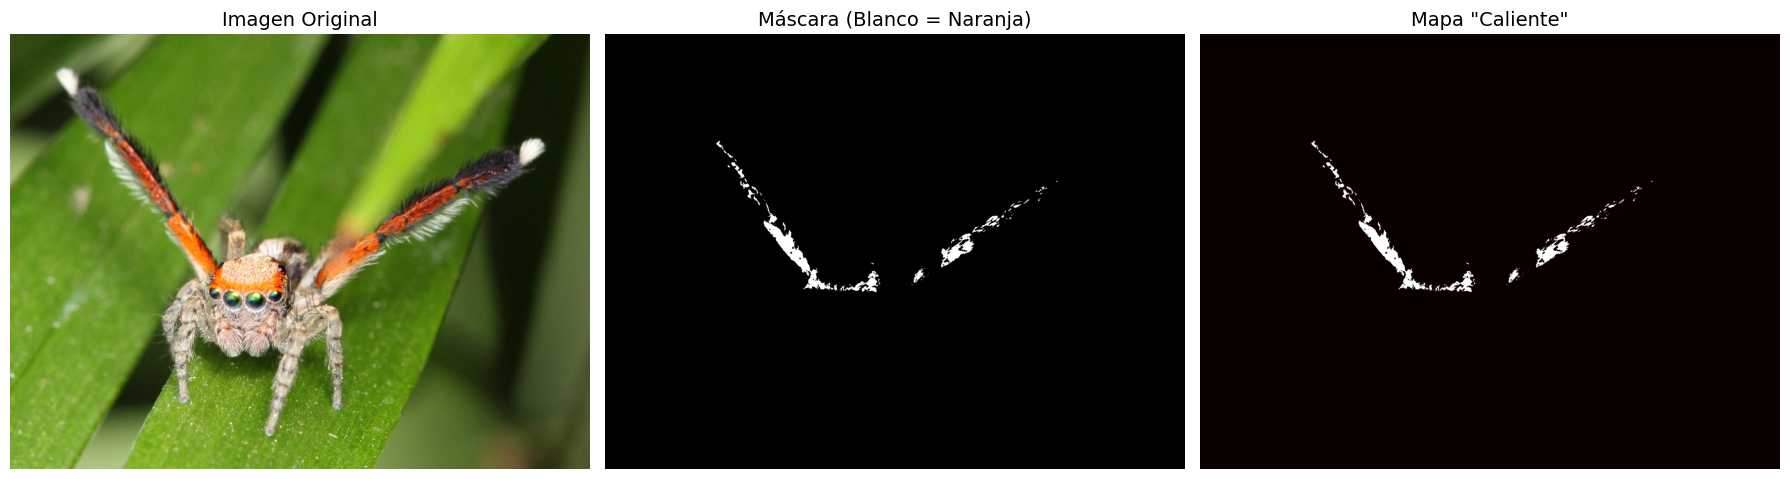


ESTADÍSTICAS DE DETECCIÓN:
   Total de píxeles analizados: 2,430,000
   Píxeles clasificados como 'naranja': 19,508
   Píxeles clasificados como 'no-naranja': 2,410,492
   Precisión de cobertura: 0.80% de la imagen


In [17]:
# Mostramos la máscara junto con la imagen original
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Imagen original
axes[0].imshow(imagen_rgb)
axes[0].set_title('Imagen Original', fontsize=14)
axes[0].axis('off')

# Máscara
axes[1].imshow(mascara_naranja, cmap='gray')
axes[1].set_title('Máscara (Blanco = Naranja)', fontsize=14)
axes[1].axis('off')

# Máscara con colores más llamativos
axes[2].imshow(mascara_naranja, cmap='hot')
axes[2].set_title('Mapa "Caliente"', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Estadísticas de la detección
print(f"\nESTADÍSTICAS DE DETECCIÓN:")
print(f"   Total de píxeles analizados: {pixeles_totales:,}")
print(f"   Píxeles clasificados como 'naranja': {pixeles_naranja:,}")
print(f"   Píxeles clasificados como 'no-naranja': {pixeles_totales - pixeles_naranja:,}")
print(f"   Precisión de cobertura: {porcentaje_naranja:.2f}% de la imagen")

## Paso 7: Resultado final

Máscara aplicada exitosamente
Todo lo que no es Naranja ahora está en negro


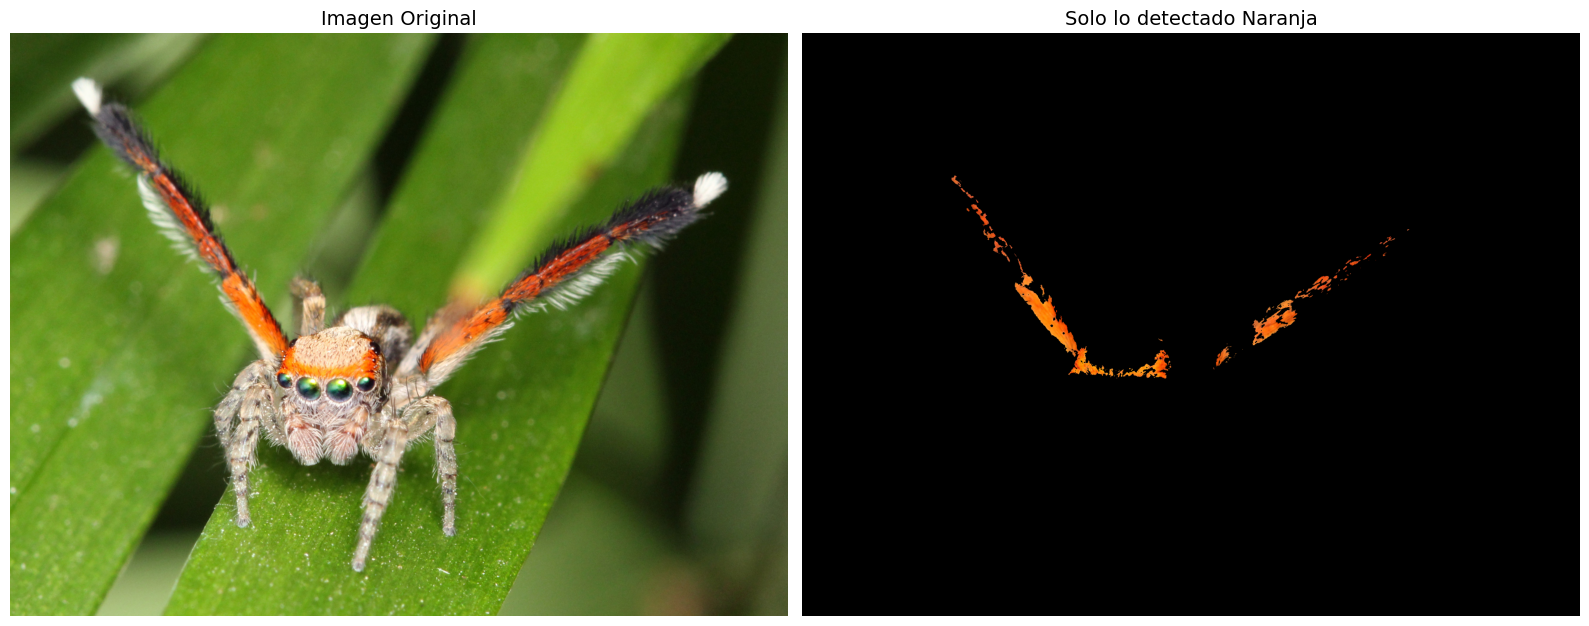


RESULTADO DEL EXPERIMENTO:
Nuestra regla RGB funcionó correctamente

MÉTRICAS FINALES:
   Píxeles Naranja detectados: 19,508
   Cobertura en la imagen: 0.80%
   Tiempo de procesamiento: Instantáneo


In [18]:

# Creamos una copia de la imagen original
imagen_final = imagen_rgb.copy()

# El símbolo ~ significa "invertir" o "lo contrario de"
imagen_final[~mascara_naranja] = 0

print("Máscara aplicada exitosamente")
print("Todo lo que no es Naranja ahora está en negro")

# Mostramos el antes y después
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Imagen original
axes[0].imshow(imagen_rgb)
axes[0].set_title('Imagen Original', fontsize=14)
axes[0].axis('off')

# Imagen con solo patron Naranja
axes[1].imshow(imagen_final)
axes[1].set_title('Solo lo detectado Naranja', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\nRESULTADO DEL EXPERIMENTO:")
if pixeles_naranja > 1000:
    print("Nuestra regla RGB funcionó correctamente")
else:
    print("Detección limitada - podríamos mejorar ajustando los umbrales")
    print("Esto es normal: encontrar los valores perfectos requiere experimentación")

print(f"\nMÉTRICAS FINALES:")
print(f"   Píxeles Naranja detectados: {pixeles_naranja:,}")
print(f"   Cobertura en la imagen: {porcentaje_naranja:.2f}%")
print(f"   Tiempo de procesamiento: Instantáneo")

## Paso 8: Verificación de nuestros píxeles de ejemplo
Vamos a verificar si nuestros píxeles de ejemplo fueron detectados correctamente.

In [19]:
print("VERIFICACIÓN FINAL - ¿NUESTROS PÍXELES DE EJEMPLO FUERON DETECTADOS?")
print("=" * 70)

# Verificamos si nuestros píxeles de ejemplo fueron detectados
fue_detectado_naranja = mascara_naranja[y_naranja, x_naranja]
fue_detectado_ojo = mascara_naranja[y_ojo, x_ojo]
fue_detectado_marron = mascara_naranja[y_marron, x_marron]

print(f"Píxel naranja (R={pixel_naranja[0]}, G={pixel_naranja[1]}, B={pixel_naranja[2]}): {'DETECTADO' if fue_detectado_naranja else 'NO DETECTADO'}")
print(f"Píxel ojo (R={pixel_ojo[0]}, G={pixel_ojo[1]}, B={pixel_ojo[2]}): {'INCORRECTAMENTE DETECTADO' if fue_detectado_ojo else 'CORRECTAMENTE IGNORADO'}")
print(f"Píxel marron (R={pixel_marron[0]}, G={pixel_marron[1]}, B={pixel_marron[2]}): {'INCORRECTAMENTE DETECTADO' if fue_detectado_marron else 'CORRECTAMENTE IGNORADO'}")


VERIFICACIÓN FINAL - ¿NUESTROS PÍXELES DE EJEMPLO FUERON DETECTADOS?
Píxel naranja (R=248, G=117, B=27): DETECTADO
Píxel ojo (R=29, G=81, B=68): CORRECTAMENTE IGNORADO
Píxel marron (R=212, G=200, B=174): CORRECTAMENTE IGNORADO


## Paso 9: Experimenta tú mismo
Ahora que entiendes cómo funciona, ¡puedes experimentar cambiando los valores!

¡HORA DE EXPERIMENTAR!
Cambia los valores abajo y observa cómo cambia el resultado:

NUEVOS UMBRALES EXPERIMENTALES:
   Rojo >= 100
   Verde <= 120
   Azul <= 120

RESULTADOS DEL EXPERIMENTO:
   Píxeles detectados con umbrales originales: 19,508
   Píxeles detectados con nuevos umbrales: 68,842
   Diferencia: 49,334 píxeles
   Nuevo porcentaje de cobertura: 2.83%

Los nuevos umbrales detectan MÁS píxeles
   Esto puede ser bueno o malo (más falsos positivos)


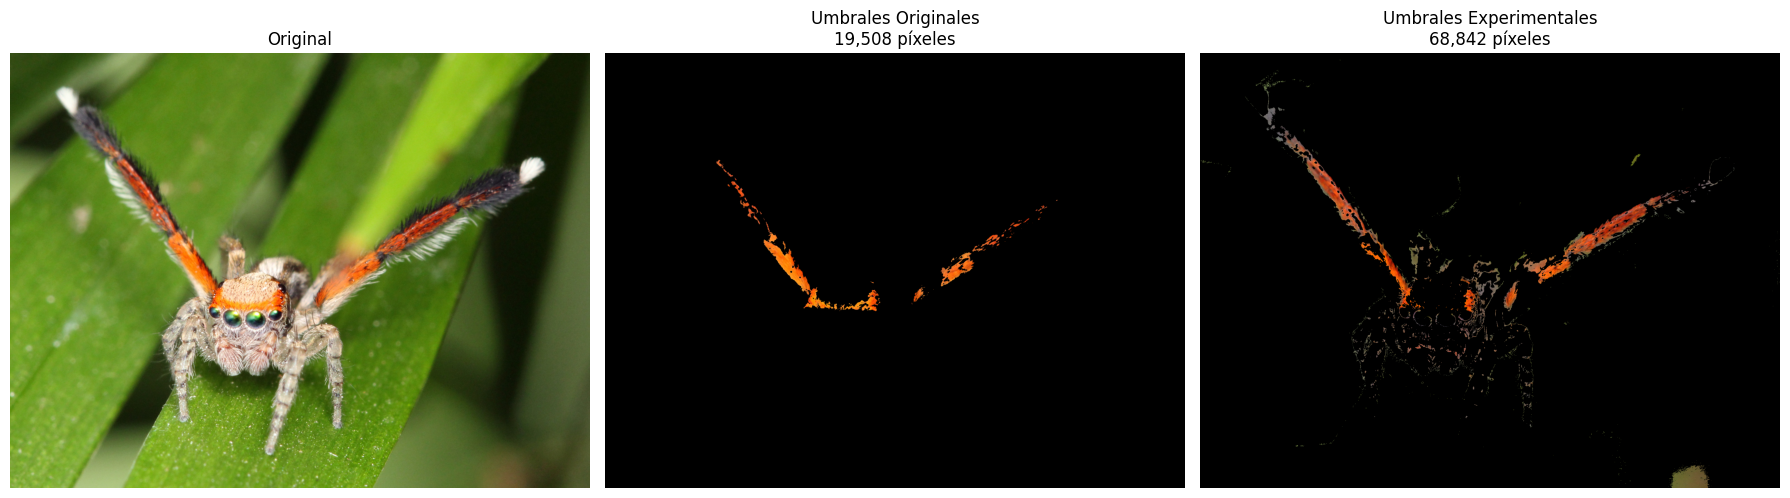

In [20]:
print("¡HORA DE EXPERIMENTAR!")
print("=" * 25)
print("Cambia los valores abajo y observa cómo cambia el resultado:")
print("")

# EXPERIMENTA CAMBIANDO ESTOS VALORES:
nuevo_umbral_rojo = 100     # Prueba valores entre 80-180
nuevo_umbral_verde = 120    # Prueba valores entre 50-150
nuevo_umbral_azul = 120     # Prueba valores entre 50-150

print(f"NUEVOS UMBRALES EXPERIMENTALES:")
print(f"   Rojo >= {nuevo_umbral_rojo}")
print(f"   Verde <= {nuevo_umbral_verde}")
print(f"   Azul <= {nuevo_umbral_azul}")

# Aplicamos los nuevos umbrales
nueva_condicion_rojo = canal_rojo >= nuevo_umbral_rojo
nueva_condicion_verde = canal_verde <= nuevo_umbral_verde
nueva_condicion_azul = canal_azul <= nuevo_umbral_azul

nueva_mascara = nueva_condicion_rojo & nueva_condicion_verde & nueva_condicion_azul
nuevos_pixeles_naranja = nueva_mascara.sum()
nuevo_porcentaje = (nuevos_pixeles_naranja / pixeles_totales) * 100

# Define the variables from previous cells
pixeles_naranja = mascara_naranja.sum()
patron_naranja = imagen_rgb.copy()
patron_naranja[~mascara_naranja] = 0

print(f"\nRESULTADOS DEL EXPERIMENTO:")
print(f"   Píxeles detectados con umbrales originales: {pixeles_naranja:,}")
print(f"   Píxeles detectados con nuevos umbrales: {nuevos_pixeles_naranja:,}")
print(f"   Diferencia: {nuevos_pixeles_naranja - pixeles_naranja:,} píxeles")
print(f"   Nuevo porcentaje de cobertura: {nuevo_porcentaje:.2f}%")

if nuevos_pixeles_naranja > pixeles_naranja:
    print("\nLos nuevos umbrales detectan MÁS píxeles")
    print("   Esto puede ser bueno o malo (más falsos positivos)")
elif nuevos_pixeles_naranja < pixeles_naranja:
    print("\nLos nuevos umbrales detectan MENOS píxeles")
    print("   Esto puede ser bueno (menos ruido) o malo")
else:
    print("\nLos resultados son iguales - ¡prueba valores más diferentes!")

# Mostramos comparación visual
imagen_experimental = imagen_rgb.copy()
imagen_experimental[~nueva_mascara] = 0

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(imagen_rgb)
axes[0].set_title('Original', fontsize=12)
axes[0].axis('off')

axes[1].imshow(patron_naranja)
axes[1].set_title(f'Umbrales Originales\n{pixeles_naranja:,} píxeles', fontsize=12)
axes[1].axis('off')

axes[2].imshow(imagen_experimental)
axes[2].set_title(f'Umbrales Experimentales\n{nuevos_pixeles_naranja:,} píxeles', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()



Con la nueva imagen generada podemos notar que detalla a la perfeccion el contorno de los detalles caracteristicos de la araña, como asi tambien la forma de los ojos